In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib

import fund_analytics
importlib.reload(fund_analytics)

from fund_analytics import PortfolioAnalytics

In [9]:
# Example usage function
def create_sample_data(n_months=60):
    """Create sample data for testing"""
    np.random.seed(42)
    
    # Generate sample data
    dates = pd.date_range('2019-01-01', periods=n_months, freq='M')
    
    # Market regimes
    regimes = np.random.choice(['Bull', 'Bear', 'Neutral'], n_months, p=[0.4, 0.2, 0.4])
    
    # Base returns
    market_returns = np.random.normal(0.008, 0.04, n_months)  # 10% annual with 14% vol
    benchmark_returns = market_returns + np.random.normal(0, 0.01, n_months)
    cash_returns = np.full(n_months, 0.002)  # 2.4% annual
    
    # Portfolio returns (with some alpha)
    alpha = 0.002  # 2.4% annual alpha
    gross_returns = benchmark_returns + alpha + np.random.normal(0, 0.005, n_months)
    
    # Fees
    mgmt_fees = np.full(n_months, 0.0015)  # 1.8% annual management fee
    perf_fees = np.maximum(0, (gross_returns - benchmark_returns) * 0.2)  # 20% performance fee
    
    data = {
        'date': dates,
        'gross_return': gross_returns,
        'market_return': market_returns,
        'benchmark_return': benchmark_returns,
        'regime': regimes,
        'management_fee': mgmt_fees,
        'performance_fee': perf_fees,
        'cash_return': cash_returns
    }
    
    df = pd.DataFrame(data)
    df.set_index('date', inplace=True)
    return df


PORTFOLIO PERFORMANCE ANALYTICS REPORT

📊 BASIC PERFORMANCE METRICS
--------------------------------------------------
Gross Annual Return:      9.93%
Net Annual Return:        7.01%
Benchmark Return:         6.22%
Cash Return:              2.43%

Gross Volatility:         14.02%
Net Volatility:           13.94%
Benchmark Volatility:     13.55%

Gross Sharpe Ratio:       0.507
Net Sharpe Ratio:         0.315

⚠️  RISK METRICS
--------------------------------------------------
Max Drawdown (Gross):     -11.59%
Max Drawdown (Net):       -12.61%
Max DD Duration (Gross):  15 months
Max DD Duration (Net):    16 months

VaR (5%, Gross):          -5.25% monthly
VaR (5%, Net):            -5.51% monthly
Expected Shortfall (Gross): -8.52% monthly
Expected Shortfall (Net):   -8.69% monthly

📈 BETA AND TRACKING METRICS
--------------------------------------------------
Beta (Gross):             1.107
Beta (Net):               1.103
Tracking Error (Gross):   1.82%
Tracking Error (Net):     1.54%
In

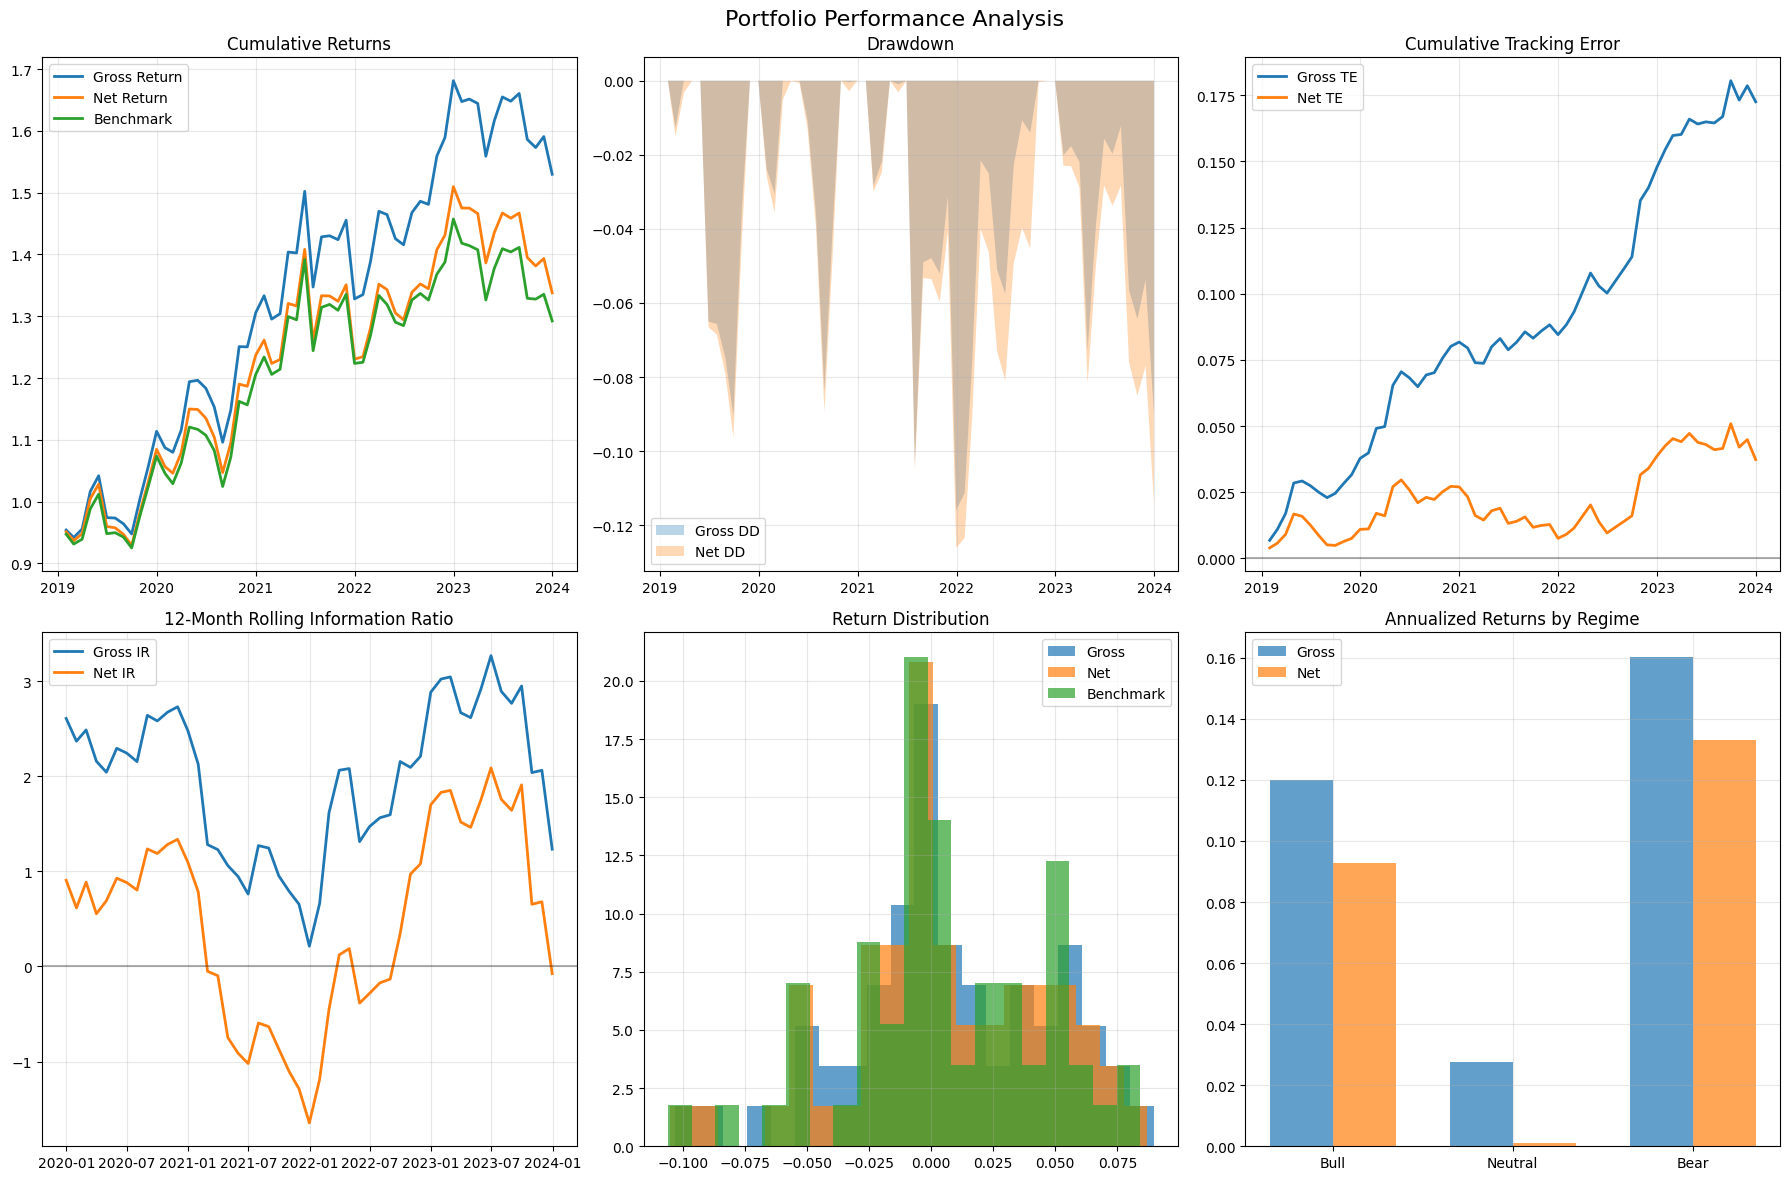

In [10]:

# Create sample data
sample_data = create_sample_data(60)

# Initialize analytics
portfolio = PortfolioAnalytics(sample_data)

# Generate comprehensive report
results = portfolio.generate_report()

# Create plots
fig = portfolio.create_plots()
plt.show()

# Export to Excel
# portfolio.export_results('portfolio_analysis.xlsx')

In [11]:
sample_data.head()

,gross_return,market_return,benchmark_return,regime,management_fee,performance_fee,cash_return
date,,,,,,,
2019-01-31,-0.045937,-0.051141,-0.052754,Bull,0.0015,0.001363,0.002
2019-02-28,-0.012689,-0.020794,-0.016753,Neutral,0.0015,0.000813,0.002
2019-03-31,0.014547,-0.010426,0.008436,Neutral,0.0015,0.001222,0.002
2019-04-30,0.063515,0.050285,0.052031,Bear,0.0015,0.002297,0.002
2019-05-31,0.025093,0.021745,0.024320,Bull,0.0015,0.000155,0.002
